## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

The analytical method involves breaking down a problem into its essential components for solution. In this project, our goal is to identify the features that signify top-quality red wine and develop a model capable of accurately predicting its quality, akin to human tasters and lab tests.

To achieve this, we'll employ both predictive and descriptive analytical techniques. The predictive model will determine the wine quality based on available features, treating it as a regression problem since wine quality is graded numerically. Factors like acidity, pH level, and sugar content, being quantitative data, make regression models like multi-linear regression, random forest, Support Vector Machine, and Decision Tree Regression suitable for analysis. Descriptive analytics will further elucidate the relationships between target and feature variables.

For feature selection, methods such as mutual information, random forest feature importance, or a basic correlation table heatmap will be utilized.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Based on our business understanding and analytical approach, our focus is on obtaining quantitative data devoid of categorical variables. This is imperative for our predictive model and regression analysis. Physiochemical tests such as acidity, citric acid, sugar content, density, pH, and alcohol levels may play crucial roles in predicting red wine quality, although their significance is uncertain. To ascertain which features are truly influential for top-quality red wine, we'll need to employ feature engineering or feature selection models.

It's essential for the data to exhibit a linear trend and lack outliers. Regression problems can yield unexpected results if outliers are present, potentially distorting our findings from reality. Additionally, the data should follow a normal distribution and remain free from errors for accurate analysis.

### Data Collection

**Q3. From where do we get our data?**

Typically, we obtain such physiochemical data from various sources including large wine manufacturers, third-party quality assurance labs, research facilities, and vineyards. These organizations prioritize maintaining product quality, backed by years of testing and experience. They possess valuable insights into which physiochemical factors significantly impact wine quality.

Regarding data acquisition, we have two options:

Seeking datasets published by these institutions. They may have publicly available data on their websites for analysis, or we might need to gather data from multiple sources through web scraping or accessing it via API.

Alternatively, if such datasets are not readily available, we may need to generate our own through experiments and simulations. Such proprietary datasets may contain sensitive company information, as physiochemical measurements could influence pricing strategies, quality maintenance, and differentiation from competitors.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Based on our understanding of the industry, it's evident that companies leverage product quality certifications to enhance their market presence. These certifications involve evaluations conducted by various laboratories and experts. While the subjective assessment by human experts, focusing on aspects like color, smell, and taste, is quick but prone to variation between individuals, the analysis of physiochemical properties is more time-consuming yet standardized.

Identifying the key physiochemical factors that significantly influence product quality and incorporating them into an algorithm can streamline this process, reducing both time and costs associated with testing. This efficiency improvement could halve the time required for business operations.

Moreover, distributors equipped with knowledge of crucial factors such as chloride levels, pH, sulfate content, and acidity can ensure proper storage conditions, thus preserving product quality. Understanding these factors can also optimize grape cultivation, aligning the grapes more closely with wine quality standards. This, in turn, reduces the need for adjustments in chloride, acid, or sulfate levels, consequently lowering raw material costs.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**



We can know how each variable influences the quality of red wine can lead to cost reductions in production, transportation, and raw materials. Moreover, it can significantly streamline operations, allowing for smoother business processes and the production of higher-quality wine, which can command premium prices. Ultimately, this enhanced quality and efficiency can drive increased sales and profits for the business.


# Data Preparation

## Import Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle
import seaborn as sns # data visualization library  
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [4]:
df_wine = pd.read_csv("/Users/sandaraung/AI_Decision/data/winequality-red.csv")

In [5]:
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#Checking for NaN value
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Checking for Null value
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There are no missing value in Red Wine Quality Dataset. Hence, we do not require to handle it.

In [10]:
# Checking for Duplicate Values

df_wine.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [11]:
# Removing Duplicated Value from dataset
df_wine.drop_duplicates(inplace = True)
df_wine.shape

(1359, 12)

### We have eliminated 240 duplicate entries from our initial dataset. Consequently, we now possess a dataset comprising 1359 unique records and 12 distinct features. This action is to mitigate the issue of redundant data, enhancing the effectiveness of our model.


## Checking For Outliers/ Handling

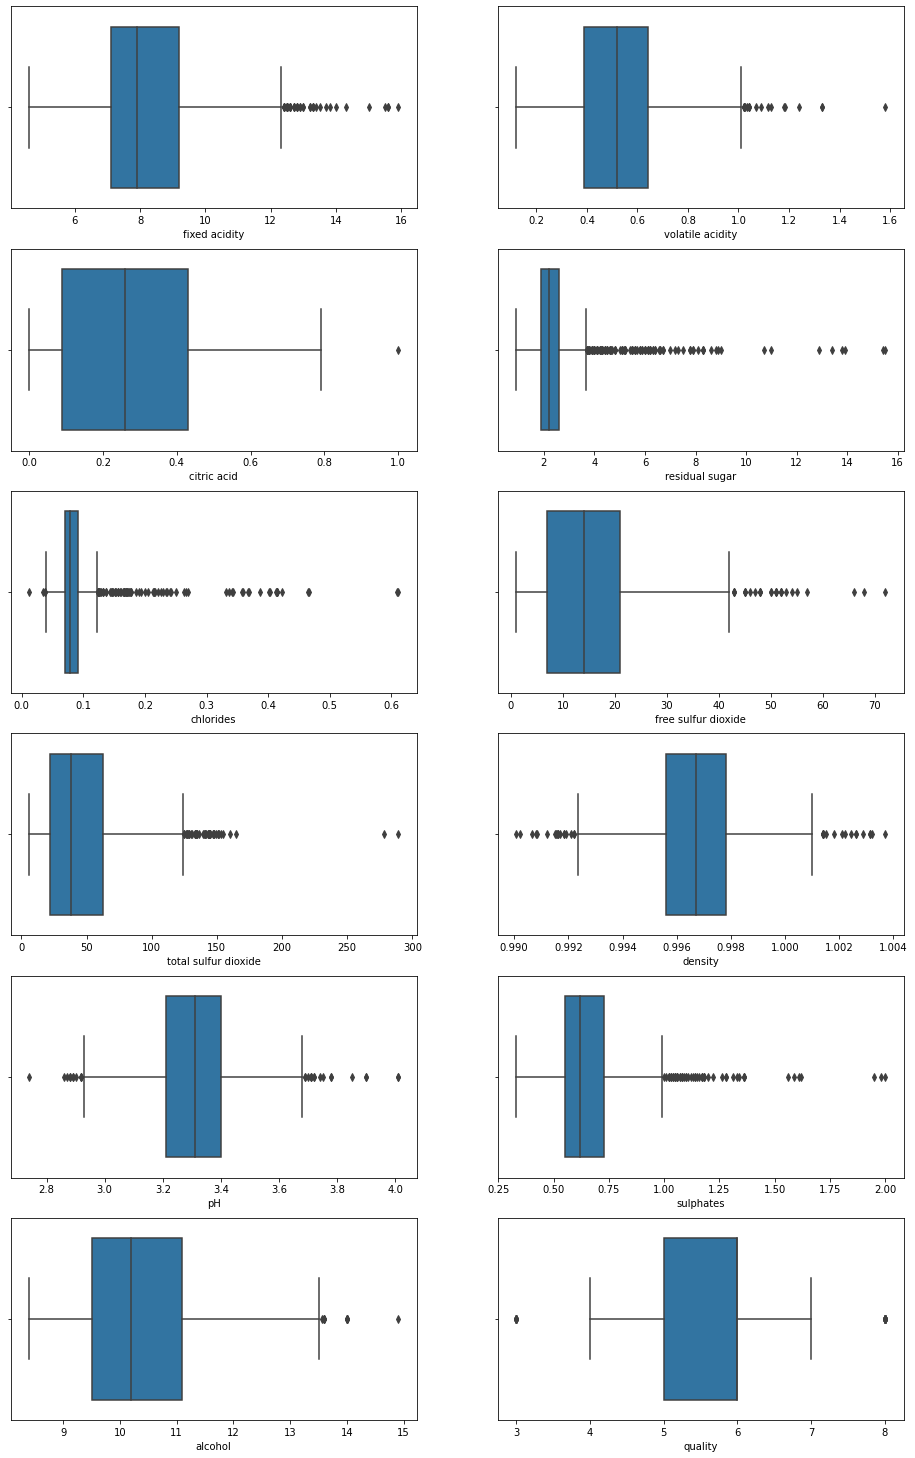

In [12]:
count = 0
df_wine_cols = df_wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(16,26))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data=df_wine,x = df_wine_cols[count],ax=ax[i][j])
        count +=1


We observe that features such as chlorides, residual sugar, and sulfates exhibit a considerable number of outliers. While one option to address this is trimming outliers using interquartile values, it risks significant loss of valuable data. Instead, we opt for a statistical approach utilizing the Z-score value.

In this method, we exclude records with a Z-score value exceeding 2.75. Essentially, we focus solely on data points that are 2.75 standard deviations away from the mean.




In [13]:
z=np.abs(zscore(df_wine))
threshold=2.75
np.where(z>threshold)

outlier_removed_df_wine=df_wine[(z<threshold).all(axis=1)].reset_index()
outlier_removed_df_wine.drop(['index'],axis=1,inplace=True)
outlier_removed_df_wine.shape


(1167, 12)

In [14]:
outlier_removed_df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [15]:
# number of records we lost
1359-1167

192

## Box Plot after handling the outliers

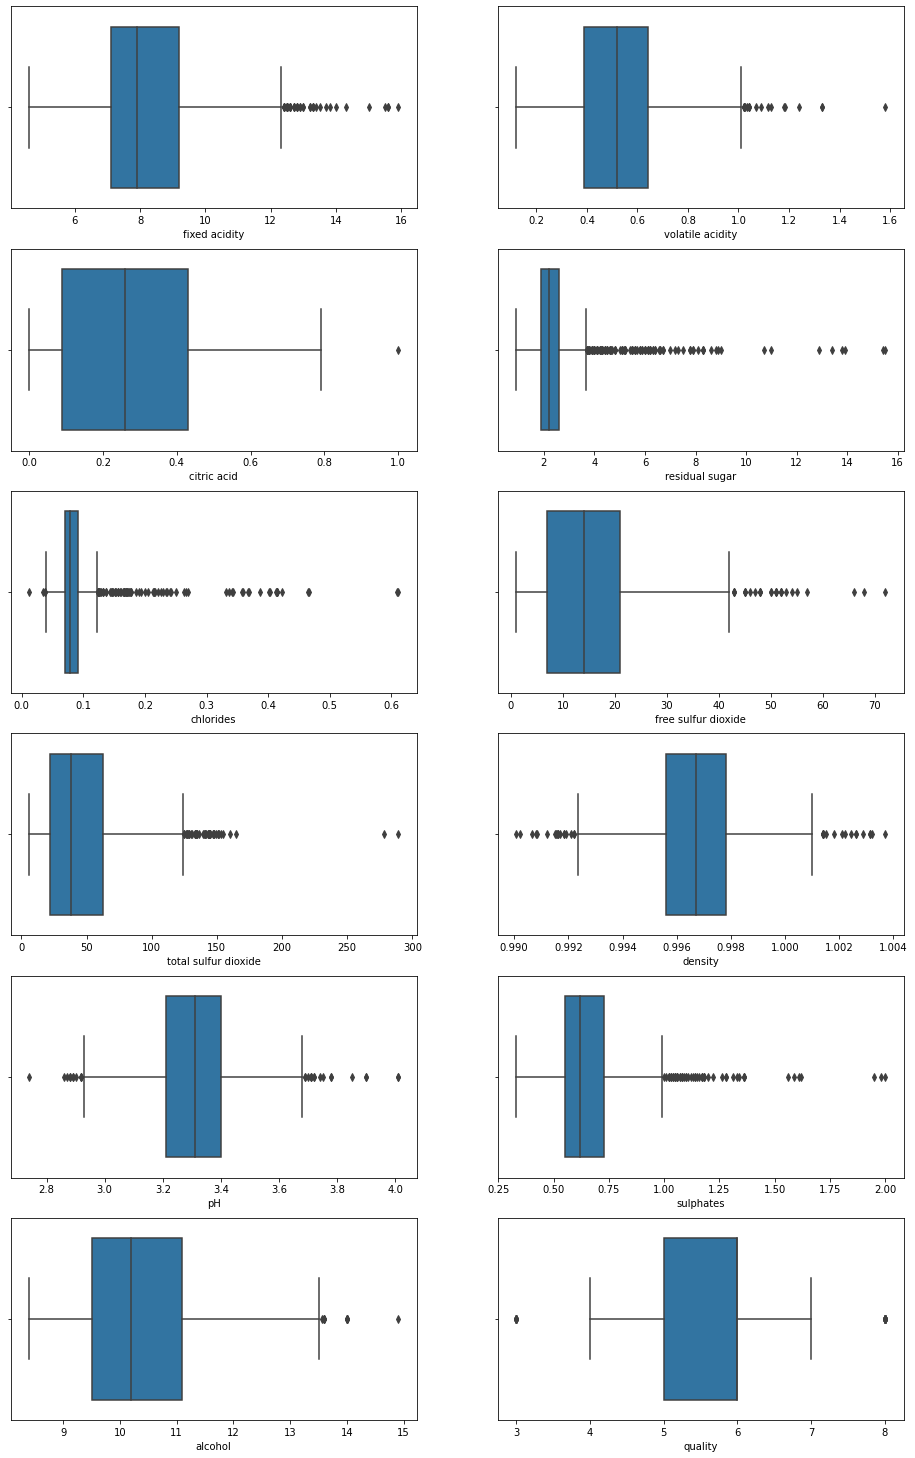

In [16]:
count = 0
df_wine_cols = df_wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(16,26))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data=df_wine,x = df_wine_cols[count],ax=ax[i][j])
        count +=1


In this instance, the majority of outliers have been successfully eliminated from the dataset, though a few outliers remain, albeit disregarded. Lowering the Z-score threshold further could remove these outliers, but at the cost of significantly reducing the number of records. Initially comprising 1599 entries, the dataset now contains 1167 records following the removal of duplicate values and outliers.

As previously discussed, there exists a trade-off between the extent of outlier removal and the reduction in the dataset's size. While the current dataset demonstrates some resilience to outliers, it's not entirely immune to them.

## Implementing Correlation heatmap

<AxesSubplot:>

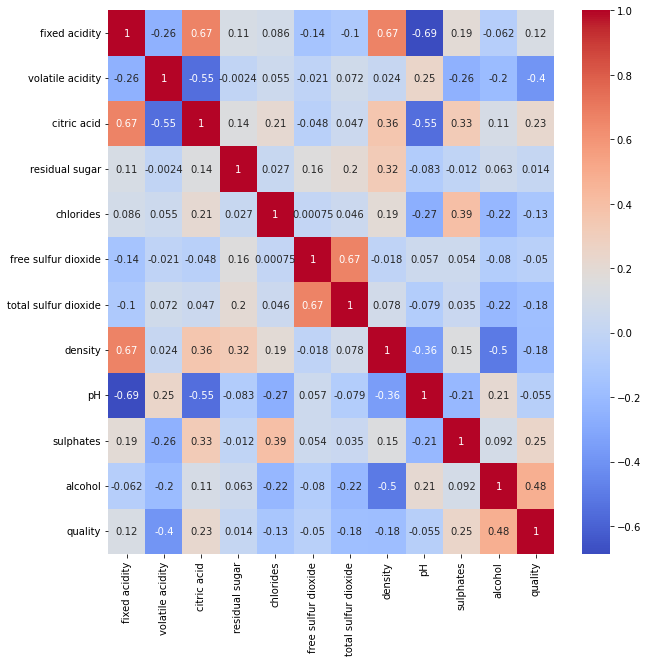

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(), annot = True, cmap='coolwarm')

In the correlation heat map analysis, we observe positive correlations among features such as fixed acidity, citric acid, sulfates, and alcohol. Conversely, volatile acidity, chlorides, density, and total sulfur dioxide show negative correlations with quality. Residual sugar, free sulfur dioxide, and pH display correlations close to zero, suggesting they lack significant importance in our dataset and can thus be excluded.

## Checking the Distribution of data using Histogram

In [18]:
feature_columns = ['fixed acidity','volatile acidity', 'citric acid' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']

In [19]:
feature_df = outlier_removed_df_wine[feature_columns]
feature_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


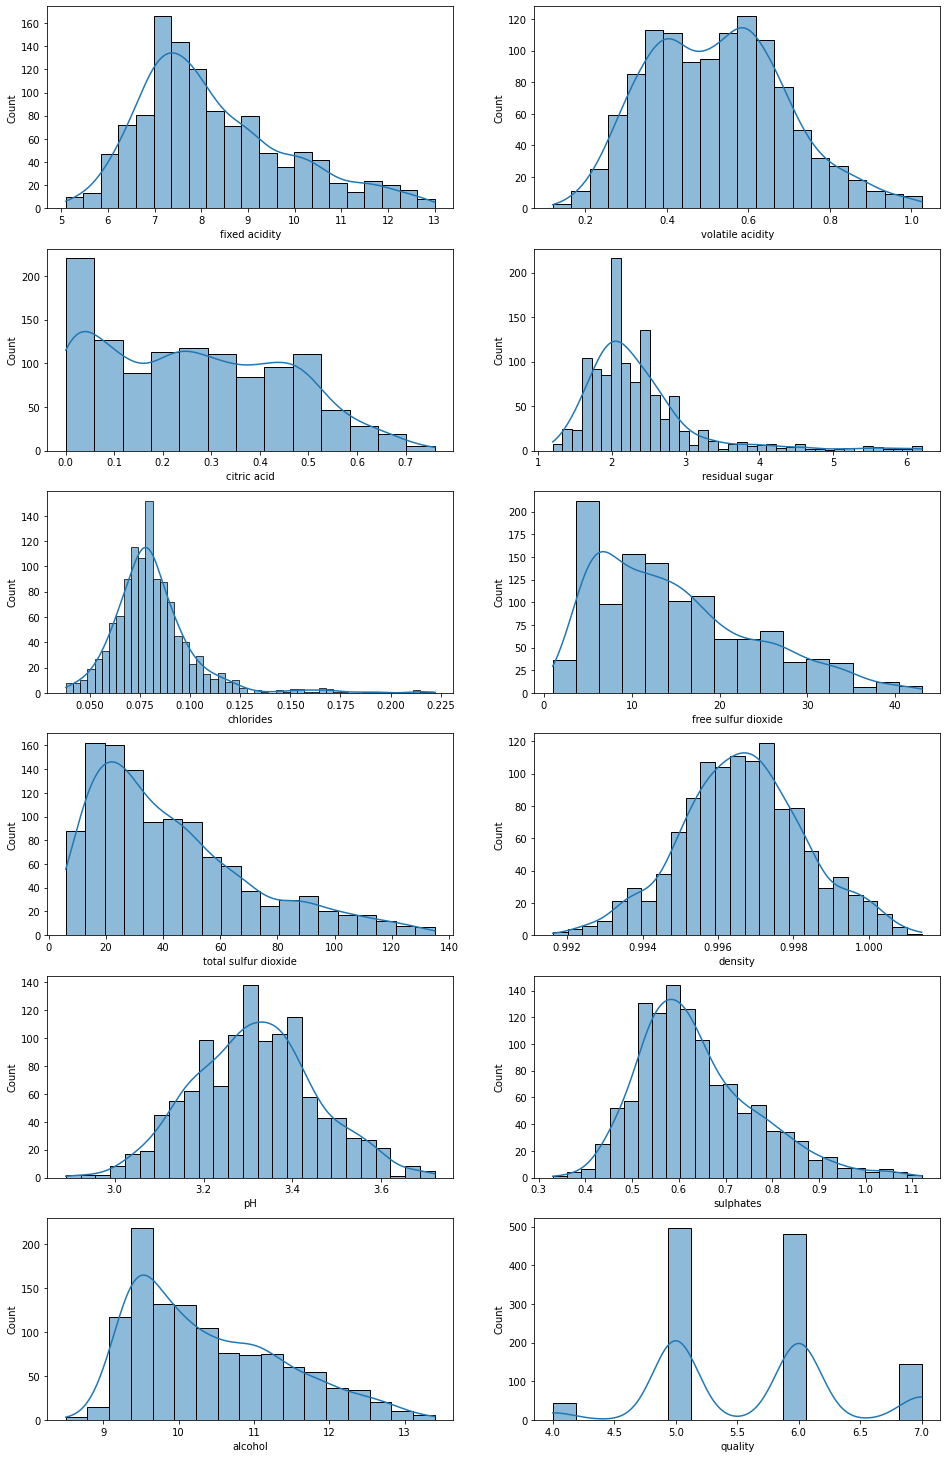

In [20]:
count = 0
df_wine_cols = df_wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(16,26))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=outlier_removed_df_wine,x = df_wine_cols[count],ax=ax[i][j], kde=True)
        count +=1


In this scenario, numerous variables exhibit left skewness, which can impact the predictive model's results. Thus, it's crucial to normalize the distribution as much as possible. To achieve this, we employ the PowerTransform function with the yeo-johnson method. Ideally, a normal distribution curve should yield a skewness value of approximately 0, and our aim is to approximate this through the chosen method.

In [21]:
outlier_removed_df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [22]:
outlier_removed_df_wine.shape

(1167, 12)

In [23]:
before = outlier_removed_df_wine.agg(['skew']).transpose()

In [24]:
before

,skew
fixed acidity,0.778241
volatile acidity,0.346303
citric acid,0.277507
residual sugar,2.272153
chlorides,2.125880
free sulfur dioxide,0.807824
total sulfur dioxide,1.060148
density,0.024120
pH,0.112692
sulphates,0.874863


In [25]:
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(feature_df)
feature_df=pd.DataFrame(X_power,columns=feature_df.columns)

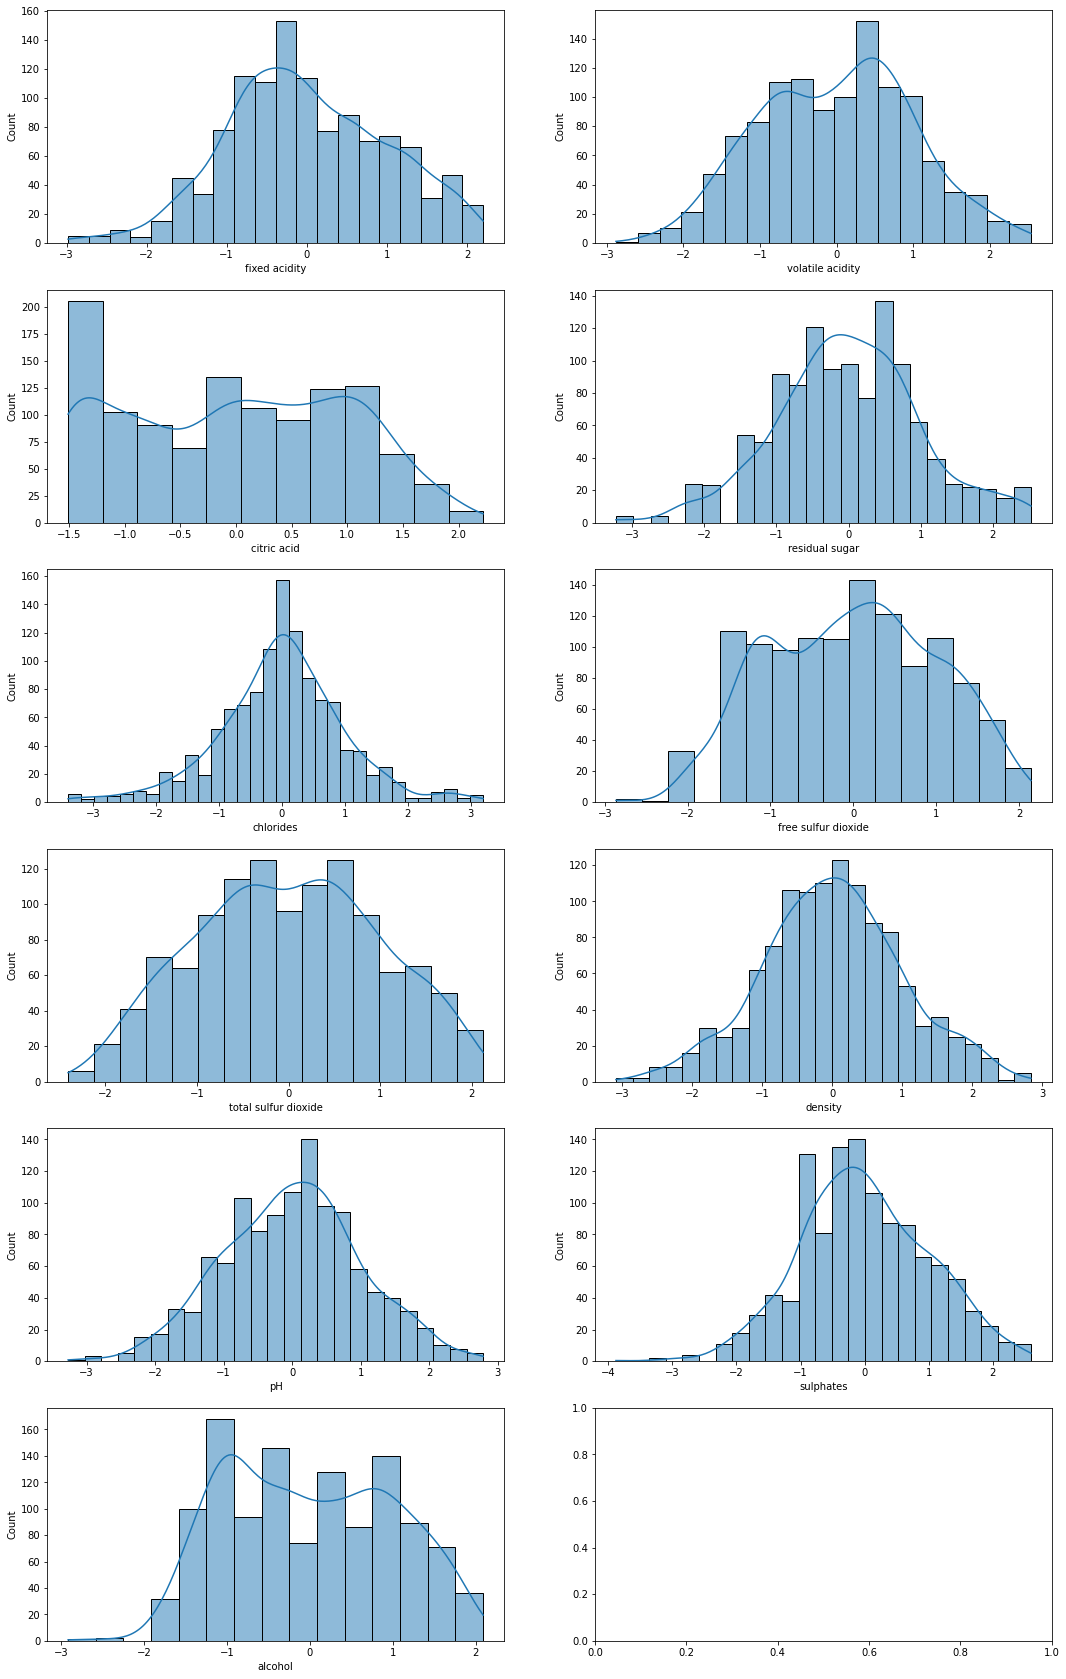

In [26]:
count = 0
wine_cols = feature_df.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=feature_df,x = wine_cols[count],kde=True,ax=ax[i][j])
        count +=1
        if count == 11:
            break

In [27]:
after = feature_df.agg(['skew']).transpose()
after

,skew
fixed acidity,0.024988
volatile acidity,0.006065
citric acid,0.017911
residual sugar,-0.009058
chlorides,-0.106582
free sulfur dioxide,-0.024388
total sulfur dioxide,-0.011340
density,0.000032
pH,0.000380
sulphates,0.016157


In [28]:
skewness= pd.concat([after,before],axis=1)
skewness.set_axis(['After Transformation','Before Transformation'],axis=1,inplace=True)
skewness.fillna(0.199198)

,After Transformation,Before Transformation
fixed acidity,0.024988,0.778241
volatile acidity,0.006065,0.346303
citric acid,0.017911,0.277507
residual sugar,-0.009058,2.272153
chlorides,-0.106582,2.125880
free sulfur dioxide,-0.024388,0.807824
total sulfur dioxide,-0.011340,1.060148
density,0.000032,0.024120
pH,0.000380,0.112692
sulphates,0.016157,0.874863


The histograms have been normalized, and the skewness has been reduced to a acceptable level.

## Modeling

### Final Dataframe

In [29]:
final_cols = ['fixed acidity','citric acid','sulphates','alcohol','volatile acidity','chlorides','density','total sulfur dioxide','quality']


In [30]:
final_df = outlier_removed_df_wine[final_cols]
final_df

,fixed acidity,citric acid,sulphates,alcohol,volatile acidity,chlorides,density,total sulfur dioxide,quality
0,7.4,0.00,0.56,9.4,0.700,0.076,0.99780,34.0,5
1,7.8,0.00,0.68,9.8,0.880,0.098,0.99680,67.0,5
2,7.8,0.04,0.65,9.8,0.760,0.092,0.99700,54.0,5
3,11.2,0.56,0.58,9.8,0.280,0.075,0.99800,60.0,6
4,7.4,0.00,0.56,9.4,0.660,0.075,0.99780,40.0,5
...,...,...,...,...,...,...,...,...,...
1162,6.8,0.08,0.82,9.5,0.620,0.068,0.99651,38.0,6
1163,6.2,0.08,0.58,10.5,0.600,0.090,0.99490,44.0,5
1164,5.9,0.10,0.76,11.2,0.550,0.062,0.99512,51.0,6
1165,5.9,0.12,0.71,10.2,0.645,0.075,0.99547,44.0,5


### Resampling

We'll use the SMOTE technique either during resampling or to equalize the distribution of the target variable.

In [31]:
X = final_df.drop('quality', axis=1)
y = final_df['quality']

In [34]:
y.value_counts()

5    498
6    481
7    144
4     44
Name: quality, dtype: int64

In [35]:
# adding samples to make allquality values same

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [36]:
y.value_counts()

5    498
6    498
7    498
4    498
Name: quality, dtype: int64

In [37]:
X.shape

(1992, 8)

In [38]:
y.shape

(1992,)

We've solved the issue of data imbalance by augmenting the data points for low-frequency occurrences to 498. This ensures that our machine learning model remains unbiased towards any specific target feature quantity.


## Feature Scaling

In [39]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
X.shape

(1992, 8)

In [41]:
X.head()

,fixed acidity,citric acid,sulphates,alcohol,volatile acidity,chlorides,density,total sulfur dioxide
0,-0.575046,-1.368224,-0.631554,-1.150560,0.886078,-0.249432,0.790487,-0.150437
1,-0.312893,-1.368224,0.292860,-0.750739,1.876967,0.886250,0.147864,1.109653
2,-0.312893,-1.152706,0.061757,-0.750739,1.216374,0.576519,0.276389,0.613254
3,1.915412,1.649026,-0.477485,-0.750739,-1.425998,-0.301054,0.919011,0.842361
4,-0.575046,-1.368224,-0.631554,-1.150560,0.665880,-0.301054,0.790487,0.078670


In [42]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Implementing Multivariable Linear Regression 

We will be using tow algorithms with Multivariate Linear Regression and Random Forest Regressor.

### Splitting the Dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=111)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=111)


In [44]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.95
0.03
0.03


## Cross-validation:

We're using cross-validation for both the linear regression and random forest models, and we'll conduct hyperparameter tuning to attain the best parameter configurations.

In [45]:
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

print("The average cross validation score for Linear Regression: ",scores_lr.mean())
print()
print("Cross validation scores:",scores_lr)

The average cross validation score for Linear Regression:  0.5059750964435152

Cross validation scores: [0.50240835 0.51016568 0.53814442 0.48992552 0.48923151]


In [46]:
rf = RandomForestRegressor()
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

print("The average cross validation score for Random Forest: ",scores_rf.mean())
print()
print("Cross validation scores:",scores_rf)

The average cross validation score for Random Forest:  0.7782232072275062

Cross validation scores: [0.77277493 0.81018404 0.79760924 0.75186071 0.75868712]


## Fitting the Linear Regression Model

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
lr.score(X_val,y_val)

0.5677935875294762

## Hyper parameter optimization of Random Forest

In [50]:
def print_results(results):

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    print('Score: {} \n BEST PARAMS: {}\n'.format(results.best_score_,results.best_params_))

    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 2), round(std * 2, 2), params))

In [52]:
parameters = {
    'n_estimators': [5, 30, 180,200],
    'max_depth': [2, 4, 8, 16, None]
}

rf_model = GridSearchCV(rf, parameters, cv=5)
rf_model.fit(X_train, y_train.values.ravel())

print_results(rf_model)

Score: 0.781195378785599 
 BEST PARAMS: {'max_depth': None, 'n_estimators': 200}

0.48 (+/-0.1) for {'max_depth': 2, 'n_estimators': 5}
0.51 (+/-0.03) for {'max_depth': 2, 'n_estimators': 30}
0.51 (+/-0.04) for {'max_depth': 2, 'n_estimators': 180}
0.51 (+/-0.05) for {'max_depth': 2, 'n_estimators': 200}
0.6 (+/-0.06) for {'max_depth': 4, 'n_estimators': 5}
0.61 (+/-0.05) for {'max_depth': 4, 'n_estimators': 30}
0.62 (+/-0.05) for {'max_depth': 4, 'n_estimators': 180}
0.62 (+/-0.05) for {'max_depth': 4, 'n_estimators': 200}
0.7 (+/-0.06) for {'max_depth': 8, 'n_estimators': 5}
0.74 (+/-0.04) for {'max_depth': 8, 'n_estimators': 30}
0.74 (+/-0.04) for {'max_depth': 8, 'n_estimators': 180}
0.75 (+/-0.04) for {'max_depth': 8, 'n_estimators': 200}
0.73 (+/-0.04) for {'max_depth': 16, 'n_estimators': 5}
0.77 (+/-0.03) for {'max_depth': 16, 'n_estimators': 30}
0.78 (+/-0.05) for {'max_depth': 16, 'n_estimators': 180}
0.78 (+/-0.05) for {'max_depth': 16, 'n_estimators': 200}
0.72 (+/-0.07) fo

In [53]:
rf = rf_model.best_estimator_

In [54]:
rf

RandomForestRegressor(n_estimators=200)

In [55]:
rf.score(X_val,y_val)

0.8080209388720028

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

## R-squared


R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 is interpreted as percentages. The higher the value is, the better the model is.

In [106]:
# Store metric results
r_squared_values = []
rmse_values = []
mae_values = []

def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2 = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2:', r2)
    return (mae, rmse, r2)

## Linear Regression

In [107]:
lr_predicted = lr.predict(X_val)
(mae, rmse, r2) = evaluate(y_val, lr_predicted)

r_squared_values.append(r2)
rmse_values.append(rmse)
mae_values.append(mae)

MAE: 0.5999173251906508
RMSE: 0.7154755585833023
R2: 0.5677935875294762


## Random Forest Regressor

In [108]:
rf_predicted = rf.predict(X_val)
(mae, rmse, r2) = evaluate(y_val, rf_predicted)

r_squared_values.append(r2)
rmse_values.append(rmse)
mae_values.append(mae)

MAE: 0.37759999999999994
RMSE: 0.47684378993544624
R2: 0.8080209388720028


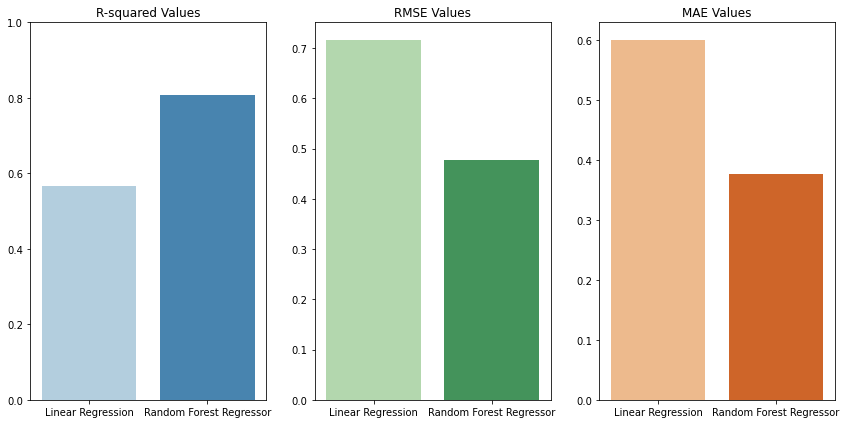

In [109]:
models = ['Linear Regression', 'Random Forest Regressor']

# Create subplots for each metric
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=r_squared_values, palette='Blues')
plt.title('R-squared Values')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=rmse_values, palette='Greens')
plt.title('RMSE Values')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=mae_values, palette='Oranges')
plt.title('MAE Values')

plt.tight_layout()
plt.show()

## Comparison

## R-Squared
> Random Forest Regressor has the highest R-squared value, indicating that it explains the most variance in the dependent variable compared to Linear Regression.


## RMSE
> Random Forest Regressor has the lowest RMSE value, implying that its predictions have the smallest average error compared to Linear Regression.


## MAE
> Similar to RMSE, Random Forest Regressor has the lowest MAE value, suggesting that its predictions have the smallest average absolute error.


Overall, **Random Forest Regressor** appears to outperform to *Linear Regression* across all three metrics, demonstrating better predictive performance and a better fit to the data.



## Feature Importance
> Using Random Forest Regressor

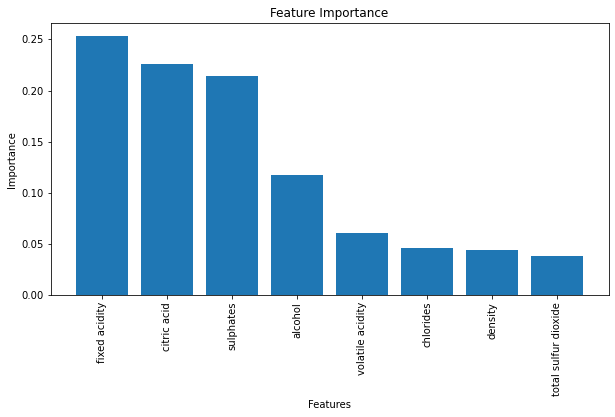

In [111]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

names = [f'{X_train.columns[i]}' for i in range(X.shape[1])]

# Create plot
plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


### Conclusion
In our analysis, Random Forest outperformed Linear Regression, yielding the best results. The features selected based on the correlation matrix appeared effective, a notion supported by the mutual information technique. Additionally, the removal of outliers, feature scaling, SMOTE transformation, skewness reduction, and hyperparameter tuning significantly contributed to enhancing model accuracy.

Phytochemicals such as Alcohol, volatile acidity, sulphates, total sulfur dioxide, fixed acidity, and citric acid emerged as influential factors in our analysis, impacting both quality assessment and pricing strategies within each company.

However, a limitation of our dataset may have influenced our findings. We observed limited variation in the quality feature, with scores 5 and 6 prevalent compared to 4 and 7, potentially introducing bias into the model. Although we attempted to mitigate this imbalance using SMOTE, duplicating data in the minority class may not fully address the issue, as it does not create balanced classes with unique values.

Furthermore, we encountered challenges in completely eliminating outliers due to the limited amount of data available. This limitation may have contributed to the poorer performance of Linear Regression compared to Random Forest, which is more resilient to outliers.

To enhance model accuracy in future endeavors, we propose implementing regularization techniques and refining data preparation processes. Concepts such as Homoscedasticity and minimizing multicollinearity can be explored to better fit regression models to the data.